## Chart Data with Altair Package

In [1]:
import altair as alt
import os
import pandas as pd
import datetime as dt
import pprint
pp = pprint.PrettyPrinter(indent=2)

#alt.renderers.enable('notebook') For old notebook not for jupyter lab


## Functions for maintance dataframes

In [3]:
def create_gr_date(df):
    #Create Day, year, month, yearmonth column
    df['day'] = [x[0:4] + x[5:7] + x[8:10] for x in df['date']]
    df['year'] = [x[0:4] for x in df['date']]
    df['month'] = [x[5:7] for x in df['date']]
    df['yearMonth'] = [x[0:4] + x[5:7] for x in df['date']]
    return df

def make_dtime_object(df,column):
    df[column] = [dt.datetime.strptime(x, '%Y%m%d') for x in df[column]]
    return df

def chart_line(df,y,y_title,x,x_title,format_x,format_y,color,title,width,grid):
    chart = alt.Chart(df, width=width, title=title).mark_line().encode(
    x = alt.X(x, axis=alt.Axis(format=format_x)),
    y = alt.Y(y, axis=alt.Axis(format=format_y, title=y_title))
    ).configure_mark(
    opacity=0.8
    ).configure_axis(
    grid=grid)
    return chart

def chart_bar(df,y,y_title,x,x_title,format_x,format_y,color,title,width,grid):
    chart = alt.Chart(df, width=width, title=title).mark_bar().encode(
    x = alt.X(x, axis=alt.Axis(format=format_x)),
    y = alt.Y(y, axis=alt.Axis(format=format_y, title=y_title))
    ).configure_mark(
    opacity=0.8
    ).configure_axis(
    grid=grid)
    return chart

## Datasets
### Name	Units	Min	Max	Description
#### NASA-USDA Global Soil Moisture Data https://developers.google.com/earth-engine/datasets/catalog/NASA_USDA_HSL_soil_moisture
revesit : 3days ; resoltion : 0.25 arc degrees (~25km)
ssm	mm	0* 	25.39* 	Surface soil moisture  
susm	mm	0* 	274.6* 	Subsurface soil moisture  
smp	fraction	0* 	1* 	Soil moisture profile  
ssma	-	-4* 	4* 	Surface soil moisture anomaly  
susma	-	-4* 	4* 	Subsurface soil moisture anomaly  
#### CHIRPS Daily: Climate Hazards Group InfraRed Precipitation with Station Data https://developers.google.com/earth-engine/datasets/catalog/UCSB-CHG_CHIRPS_DAILY
revesit : daily ; resolution : 0.05 arc degrees (~5km)
precipitation mm 
####  GLDAS-2.1: Global Land Data Assimilation System https://developers.google.com/earth-engine/datasets/catalog/NASA_GLDAS_V021_NOAH_G025_T3H
revesit : 3 H , resolotion : 0.25 arc degrees (~25km)  
Albedo_inst 	% 	4.99* 	82.25* 	Albed  
AvgSurfT_inst 	K 	187.48* 	1323.35* 	Average surface skin temperature  
CanopInt_inst 	kg/m^2 	0* 	0.5* 	Plant canopy surface water  
ECanop_tavg 	W/m^2 	0* 	1273.66* 	Canopy water evaporation  
ESoil_tavg 	W/m^2 	0* 	2275.63* 	Direct evaporation from bare soil  
Evap_tavg 	kg/m^2/s 	0* 	0.002* 	Evapotranspiration  
LWdown_f_tavg 	W/m^2 	26.85* 	600.9* 	Downward long-wave radiation flux  
Lwnet_tavg 	W/m^2 	-13792.7* 	196.97* 	Net long-wave radiation flux  
PotEvap_tavg 	W/m^2 	-227.75* 	18977.9* 	Potential evaporation rate  
Psurf_f_inst 	Pa 	44063.1* 	108344* 	Pressure 
Qair_f_inst 	kg/kg 	-0.02* 	0.07* 	Specific humidity  
Qg_tavg 	W/m^2 	-552.64* 	1538.41* 	Heat flux  
Qh_tavg 	W/m^2 	-1005.15* 	18190.6* 	Sensible heat net flux  
Qle_tavg 	W/m^2 	-227.75* 	5072.25* 	Latent heat net flux  
Qs_acc 	kg/m^2 	0* 	170.93* 	Storm surface runoff  
Qsb_acc 	kg/m^2 	0* 	50.6* 	Baseflow-groundwater runoff  
Qsm_acc 	kg/m^2 	0* 	42.87* 	Snow melt  
Rainf_f_tavg 	kg/m^2/s 	0* 	0.01* 	Total precipitation rat  
Rainf_tavg 	kg/m^2/s 	0* 	0.01* 	Rain precipitation rate  
RootMoist_inst 	kg/m^2 	2* 	949.6* 	Root zone soil moisture  
SWE_inst 	kg/m^2 	0* 	120787* 	Snow depth water equivalent  
SWdown_f_tavg 	W/m^2 	-56.93* 	30462.8* 	Downward short-wave radiation flux  
SnowDepth_inst 	m 	0* 	301.96* 	Snow depth  
Snowf_tavg 	kg/m^2/s 	0* 	0.009* 	Snow precipitation rate  
SoilMoi0_10cm_inst 	kg/m^2 	1.99* 	47.59* 	Soil moisture  
SoilMoi10_40cm_inst 	kg/m^2 	5.99* 	142.8* 	Soil moisture  
SoilMoi40_100cm_inst 	kg/m^2 	11.99* 	285.6* 	Soil moisture  
SoilMoi100_200cm_inst 	kg/m^2 	20* 	476* 	Soil moisture  
SoilTMP0_10cm_inst 	K 	221.98* 	377.5* 	Soil temperature  
SoilTMP10_40cm_inst 	K 	227.43* 	319.44* 	Soil temperature  
SoilTMP40_100cm_inst 	K 	232.97* 	316.2* 	Soil temperature  
SoilTMP100_200cm_inst 	K 	238.52* 	314.11* 	Soil temperature  
Swnet_tavg 	W/m^2 	-48.96* 	23741.3* 	Net short wave radiation flux  
Tair_f_inst 	K 	206.8* 	327.66* 	Air temperature  
Tveg_tavg 	W/m^2 	0* 	3455.14* 	Transpiration  
Wind_f_inst 	m/s 	0* 	57.7* 	Wind speed  

In [19]:
#Source Files
files = [x for x in os.listdir() if '.csv' in x]
#Empty datasets
SMOS_ried, chirps_ried,GLDAS_ried = [],[],[]
#Iterate through files and sort collections to dataframes
for file in files:
    if 'chirps' in file:
        df = pd.read_csv(file)
        chirps_ried.append(df)
    elif 'SMOS' in file:
        df = pd.read_csv(file)
        SMOS_ried.append(df)
    elif 'GLDAS' in file:
        df = pd.read_csv(file)
        GLDAS_ried.append(df)

# Create Dataframes for 2010-2019
SMOS_ried = pd.concat(SMOS_ried,ignore_index=True) #smp, ssm, ssma, susm, susma
chirps_ried = pd.concat(chirps_ried,ignore_index=True) 
GLDAS_ried = pd.concat(GLDAS_ried, ignore_index=True)
data_files = [SMOS_ried,chirps_ried,GLDAS_ried]
#Create statistical or categorigal columns
for data in data_files:
    data = create_gr_date(data)


# Charting

## Hessisches Ried 
Reduce data to overall mean per image. Data used: (SMOS 25km, chrisp 5km,GLDAS )

In [20]:
#Convert Kelvin column to Celcius Degree Column
GLDAS_ried['AvgSurfT_inst'] = [x - 273.15 for x in GLDAS_ried['AvgSurfT_inst']]
#Convert day column to datetime format for groupby with pandas
GLDAS_daily = make_dtime_object(df=GLDAS_ried,column='day').groupby('day').mean().reset_index()
pp.pprint(GLDAS_ried)

       Albedo_inst  AvgSurfT_inst  CanopInt_inst  ECanop_tavg  ESoil_tavg  \
0        18.654666       3.284928       0.500000     0.021333    0.106667   
1        18.295333       2.760063       0.500000     0.312000    1.216000   
2        18.009334       1.597996       0.500000     0.720000    2.054000   
3        17.810000       1.279401       0.500000     1.174000    2.994000   
4        17.589334       0.914178       0.500000     2.556000    6.764000   
...            ...            ...            ...          ...         ...   
27499    14.965332      25.789038       0.004200    17.940666    6.876667   
27500    14.965332      28.219989       0.003267     7.986667   12.453334   
27501    14.965332      26.401786       0.002333     5.760667    9.146000   
27502    14.965332      21.654822       0.001933     2.646000    4.622667   
27503    14.965332      16.426902       0.001333     0.256667    0.151333   

          Evap_tavg  LWdown_f_tavg  Lwnet_tavg  PotEvap_tavg   Psurf_f_inst

In [10]:
def theme_test():
    return {
        "config": {
            "axisLeft" : {
                'labelFontSize' : 15,
                'labelFontColor' : ''}}}
# register the custom theme under a chosen name
alt.themes.register('theme_test', theme_test)
# enable the newly registered theme
alt.themes.enable('theme_test')

ThemeRegistry.enable('theme_test')

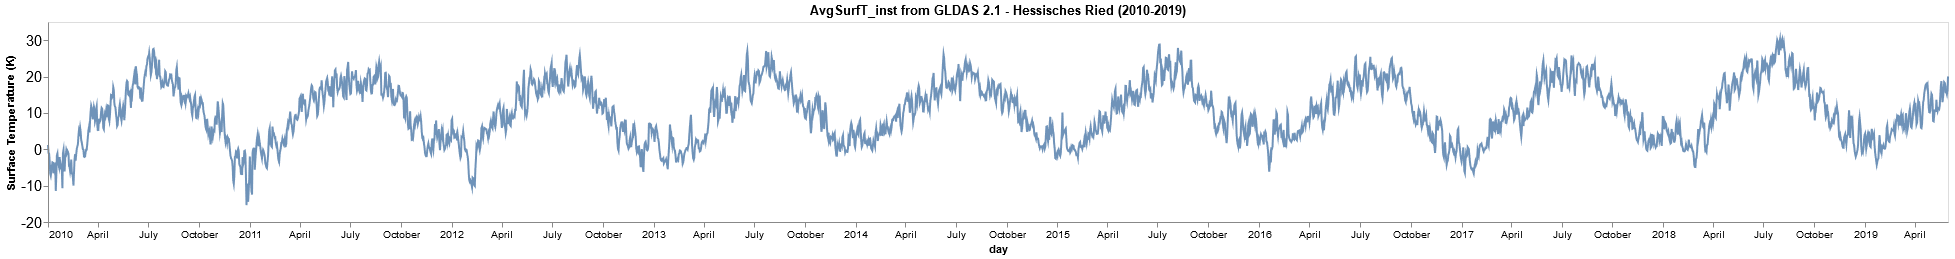

In [21]:
chart1 = chart_line(df=SMOS_ried,y='ssm:Q',y_title='surface soil-moisture (mm)', x='date:T',x_title='',format_x='',format_y='',color='blue',title='Surface Soil Moisture - Hessisches Ried (2010-2019)' ,width=1900,grid=False)
chart2 = chart_bar(df=chirps_ried,y='precipitation:Q',y_title='precipitation (mm)', x='date:T',x_title='',format_x='',format_y='',color='blue',title='Precipitation from chirps model - Hessisches Ried (2010-2019)' ,width=1900,grid=False)
chart3 = chart_line(df=GLDAS_daily,y='AvgSurfT_inst:Q',y_title='Surface Temperature (°C)', x='day:T',x_title='',format_x='',format_y='',color='blue',title='AvgSurfT_inst from GLDAS 2.1 - Hessisches Ried (2010-2019)' ,width=1900,grid=False)
#pp.pprint(GLDAS_daily)
chart3
#chart2+chart1

In [ ]:
chart 

chart_sm = alt.Chart(sm_point1).mark_point().encode(x='date', y= 'smp')
chart_pp = alt.Chart(rad_point1).mark_point().encode(x='date', y='mean')
#alt.vconcat(chart_sm, chart_pp)
chart_sm + chart_pp

#Chart_SMOS = alt.Chart(SMOS_ried,width=1920).encode(x='date:T', y='smp:Q')
#Chart_SMOS.mark_line() + Chart_SMOS.mark_point() 
#alt.layer(Chart_SMOS.mark_line(),Chart_SMOS.mark_point(),Chart_SMOS.mark_rule(color='blue'))
#Chart_SMOS = alt.Chart(SMOS_ried,width=1920).mark_line().encode(x='yearmonth(date):T', y='average(smp):Q') #Seasonal trends aggregate yearmonth
#Chart_SMOS = alt.Chart(SMOS_ried,width=600).mark_bar().encode(y='yearmonth(date):T', x='average(smp):Q') 
#Chart_SMOS = alt.Chart(SMOS_ried,width=600).mark_bar().encode(y='yearmonth(date):T', x='average(smp):Q').interactive()
#Chart_SMOS = alt.Chart(SMOS_ried).mark_point().encode(x='date:T', y='smp:Q', column='year(date):T')
#Chart_SMOS